In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
PATH = Path("data/soda_bottles")
arch = resnet50
bs = 32
sz = 224

In [3]:
df = pd.read_csv(train_csv)
cols = df.columns.tolist()
cols = list(reversed(cols))
df = df[cols]
df.to_csv(PATH/'Images/train_ds.csv', index=False)

NameError: name 'train_csv' is not defined

In [4]:
train_csv = PATH/'Images/train_ds.csv'
n = len(list(open(train_csv))) -1
cv_idxs = get_cv_idxs(n)

In [6]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'Images', train_csv, tfms=tfms, val_idxs=cv_idxs)
    return data

In [7]:
data = get_data(sz, bs)

In [8]:
data.trn_ds.fnames[0]

'Images/./M.Beer/1351_corrected.jpg'

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 65/83 [00:01<00:00, 63.32it/s, loss=10.4]


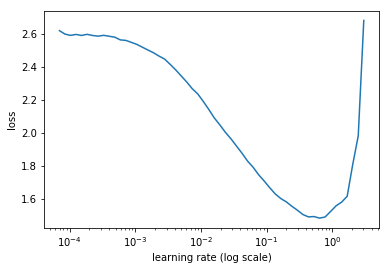

In [10]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True)
learn.lr_find(wds=1e-4, end_lr=100)
learn.sched.plot(10, 1)

In [51]:
learn.fit(0.1, 1, cycle_len=50, use_clr=(15, 15, 0.95, 0.85), wds=1e-4)

HBox(children=(IntProgress(value=0, description='Epoch', max=50), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.478399   0.175323   0.939531  
    1      0.277522   0.117887   0.95994                   
    2      0.210255   0.114298   0.966742                  
    3      0.176398   0.096305   0.972789                  
    4      0.157695   0.076997   0.979592                  
    5      0.123079   0.079758   0.972033                  
    6      0.102004   0.079987   0.979592                  
    7      0.08674    0.059008   0.98715                    
    8      0.076812   0.097919   0.969766                   
    9      0.07488    0.05496    0.984883                   
    10     0.065532   0.055207   0.985639                   
    11     0.060313   0.063566   0.985639                   
    12     0.056687   0.058669   0.980348                   
    13     0.048786   0.045386   0.988662                   
    14     0.044994   0.069991   0.989418                   
    15     0.041053   0.053336   0.989418       

[array([0.07199]), 0.9909297052154195]

In [56]:
learn.save('default_size_soda_99_1cycle')

In [11]:
learn.load('default_size_soda_99_1cycle')

In [53]:
size_d = {k: PIL.Image.open(PATH/k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

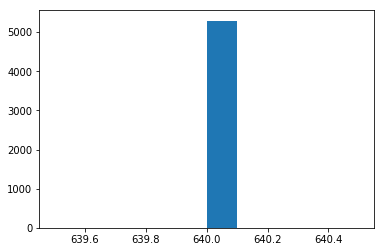

In [54]:
plt.hist(row_sz[row_sz<1000]);

In [55]:
data = data.resize(64, 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [57]:
learn.set_data(get_data(64, bs))

In [60]:
learn.lr_find(end_lr=100)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 72%|███████▏  | 60/83 [00:00<00:00, 65.99it/s, loss=0.0659]


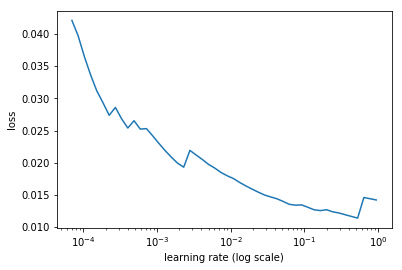

In [61]:
learn.sched.plot()

In [62]:
learn.precompute = False
learn.unfreeze()

In [63]:
lrs = [1e-9, 1e-6, 0.1]

In [64]:
learn.fit(lrs, 1, cycle_len=50, wds=1e-4, use_clr=(15, 15, 0.95, 0.85))

HBox(children=(IntProgress(value=0, description='Epoch', max=50), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.936174   0.897439   0.596372  
    1      1.227209   0.782628   0.652305                 
    2      1.088914   0.725383   0.684807                 
    3      1.029612   0.773266   0.644747                 
    4      0.980086   0.707941   0.683296                  
    5      0.950861   0.693572   0.686319                  
    6      0.937394   0.666252   0.699169                  
    7      0.919838   0.65871    0.693122                  
    8      0.889719   0.664276   0.694633                  
    9      0.885462   0.650627   0.724868                  
    10     0.873962   0.637322   0.708239                  
    11     0.884706   0.66367    0.696901                  
    12     0.887376   0.615378   0.727135                  
    13     0.87258    0.654679   0.687075                  
    14     0.849606   0.599444   0.724112                  
    15     0.861381   0.604418   0.752834                  


[array([0.45126]), 0.8148148140939725]

In [65]:
learn.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 93%|█████████▎| 77/83 [00:22<00:01,  3.49it/s, loss=2.75] 

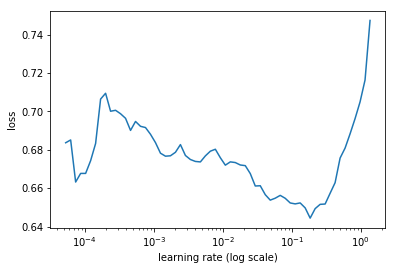

 93%|█████████▎| 77/83 [00:40<00:03,  1.92it/s, loss=2.75]

In [66]:
learn.lr_find()
learn.sched.plot()

In [67]:
learn.fit(0.15, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  8%|▊         | 7/83 [00:02<00:25,  2.93it/s, loss=0.634]


Exception in thread Thread-120:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.845263   0.624036   0.719577  
    1      0.884261   0.585128   0.725624                  
    2      0.913716   0.57027    0.751323                  



[array([0.57027]), 0.7513227518183304]